In [239]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [235]:
Data = pd.read_csv('./titanic_dataset.csv')

In [236]:
Data['Survived'] = Data['Survived'].astype('int64')

In [204]:
Data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1.000000,0.381594,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.000000,0.381594,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0.523008,0.381594,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3.000000,1.000000,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.000000,0.381594,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0.523008,0.381594,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1.000000,5.000000,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4.000000,1.000000,382652,29.1250,NaN,Q
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0.523008,0.381594,239865,26.0000,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0.523008,0.381594,113788,35.5000,A6,S


In [205]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,376.000000,376.000000,376.000000,323.000000,376.000000,376.000000,376.000000
mean,446.970745,0.529255,1.670213,31.740712,1.225950,0.951856,62.990636
std,254.335090,0.499808,0.824793,16.674316,1.339590,0.899189,64.795404
min,2.000000,0.000000,1.000000,0.830000,0.523008,0.381594,20.212500
25%,236.250000,0.000000,1.000000,21.000000,0.523008,0.381594,26.550000
50%,455.500000,1.000000,1.000000,32.000000,1.000000,0.381594,39.000000
75%,661.500000,1.000000,2.000000,44.000000,1.000000,1.000000,76.729200
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

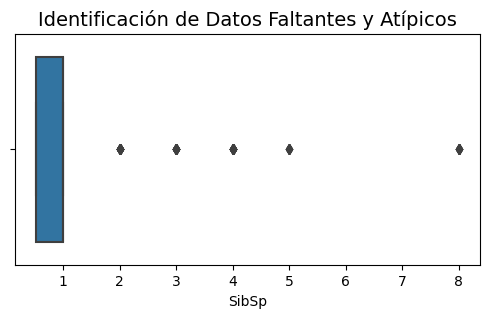

In [208]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=14)

In [209]:
print("Cantidad de Registros con cero en PassengerId: ",Data['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  177
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en Fare:  0


In [210]:
Data['PassengerId']=Data['PassengerId'].replace(0,Data['PassengerId'].mean())
Data['Survived']=Data['Survived'].replace(0,Data['Survived'].mean())
Data['SibSp']=Data['SibSp'].replace(0,Data['SibSp'].mean())
Data['Parch']=Data['Parch'].replace(0,Data['Parch'].mean())
Data['Fare']=Data['Fare'].replace(0,Data['Fare'].mean())

In [211]:
print("Cantidad de Registros con cero en PassengerId: ",Data['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Data['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Parch:  0
Cantidad de Registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

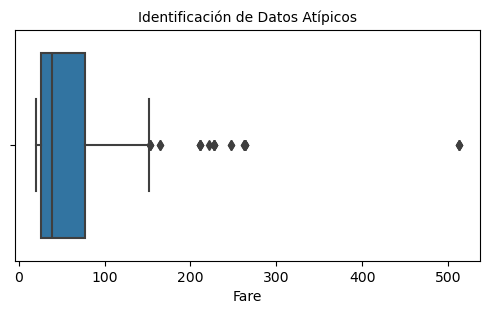

In [212]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [213]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [214]:
Data=Data[(Data['Fare']<nivel_maximo)&(Data['Fare']>nivel_minimo)]

In [215]:
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [216]:
Data['Survived'] = Data['Survived'].astype('int64')

In [217]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  376 non-null    int64  
 1   Survived     376 non-null    int64  
 2   Pclass       376 non-null    int64  
 3   Name         376 non-null    object 
 4   Sex          376 non-null    object 
 5   Age          323 non-null    float64
 6   SibSp        376 non-null    float64
 7   Parch        376 non-null    float64
 8   Ticket       376 non-null    object 
 9   Fare         376 non-null    float64
 10  Cabin        178 non-null    object 
 11  Embarked     374 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 46.3+ KB


In [218]:
Data['Survived'].value_counts()

Survived
1    199
0    177
Name: count, dtype: int64

In [219]:
Data[['Survived']].head(40)

,Survived
1,1
3,1
6,0
7,0
9,1
11,1
13,0
16,0
20,0
23,1


In [220]:
M = Data.drop('Survived',axis=1) 
N = Data['Survived']

M_train, M_test, N_train, N_test = train_test_split(M, N, test_size=0.25, stratify=N, random_state= 0)

In [221]:
print (M_train)

     PassengerId  Pclass                                               Name  \
139          140       1                                 Giglio, Mr. Victor   
472          473       2            West, Mrs. Edwy Arthur (Ada Mary Worth)   
310          311       1                     Hays, Miss. Margaret Bechstein   
16            17       3                               Rice, Master. Eugene   
549          550       2                     Davies, Master. John Morgan Jr   
..           ...     ...                                                ...   
583          584       1                                Ross, Mr. John Hugo   
669          670       1  Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)   
632          633       1                          Stahelin-Maeglin, Dr. Max   
867          868       1               Roebling, Mr. Washington Augustus II   
685          686       2             Laroche, Mr. Joseph Philippe Lemercier   

        Sex   Age     SibSp     Parch         Ticke

In [222]:
print (N_train)

139    0
472    1
310    1
16     0
549    1
      ..
583    0
669    1
632    1
867    0
685    0
Name: Survived, Length: 282, dtype: int64


In [223]:
print(Data['Survived'].unique())

[1 0]


In [238]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (M_train , N_train)
Prediccion = modelo_regresion.predict(M_test)

ValueError: could not convert string to float: 'Giglio, Mr. Victor'

In [169]:
print (N_test)

117    0
409    0
686    0
249    0
118    0
      ..
783    0
711    0
211    1
74     1
341    1
Name: Survived, Length: 94, dtype: int64


In [232]:
print (Prediccion)

NameError: name 'Prediccion' is not defined